In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow --quiet

In [ ]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for working with dates and times
import datetime as dt

# Import TensorFlow and Keras libraries for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN, Reshape, Flatten
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from keras.regularizers import l2

# Import scikit-learn library for various metrics and preprocessing tools
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import MinMaxScaler

# Import matplotlib library for creating plots and charts
import matplotlib.pyplot as plt

# Magic command to display plots inline in the Jupyter Notebook
%matplotlib inline

In [ ]:
# Calculate the accuracy of each model
def evaluateModel(test,pred,val,pred_val):
  print('** Testing **')
  test_mae = mean_absolute_error(test, pred)
  print('MAE: ', test_mae)

  test_ape = np.abs((test - pred) / test)
  test_mape = np.mean(test_ape) * 100
  print('MAPE: ', test_mape)

  test_mse = mean_squared_error(test, pred)
  test_rmse = np.sqrt(test_mse)
  print('RMSE: ', test_rmse)

  print('\n** Validate **')
  val_mae = mean_absolute_error(val, pred_val)
  print('MAE: ', val_mae)

  val_ape = np.abs((val - pred_val) / val)
  val_mape = np.mean(val_ape) * 100
  print('MAPE: ', val_mape)

  val_mse = mean_squared_error(val, pred_val)
  val_rmse = np.sqrt(val_mse)
  print('RMSE: ', val_rmse)

In [ ]:
# Read in the Platinum dataset from a CSV file
df=pd.read_csv("/content/drive/MyDrive/PTDLKD/Data/Platinum_Data.csv")
df=df.set_index(pd.DatetimeIndex(df['Date'].values))


# Preprocessing Data

---

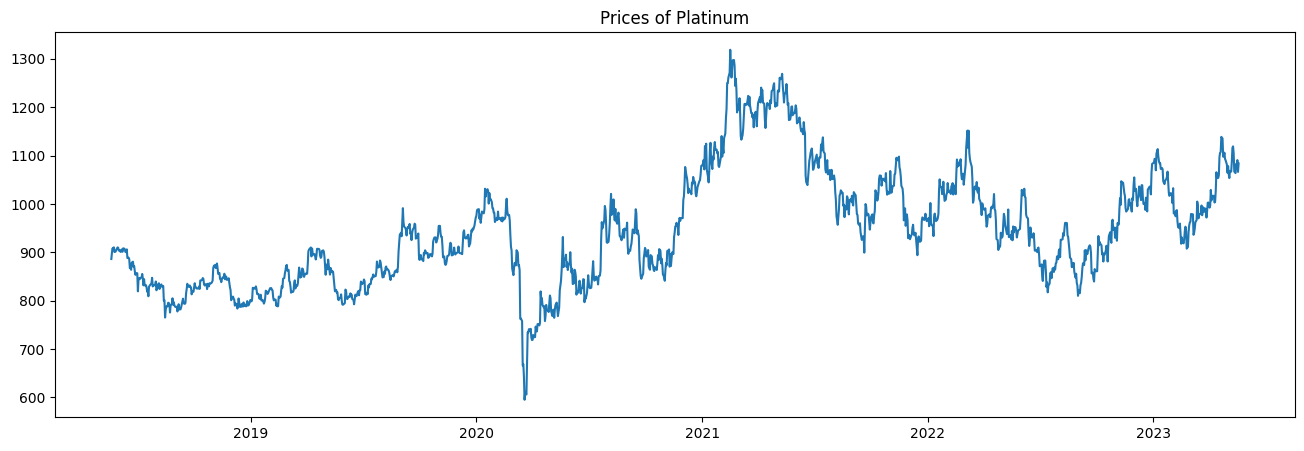

In [ ]:
# Format column Date
df.index = pd.to_datetime(df.index,format='%m/%d/%Y')

# Format column Price to float
df['Price'] = df.Price.str.replace(',','').astype(float)

# Flip the column
df = df.iloc[::-1]

# Create new Dataframe
df1 = pd.DataFrame(df, columns=['Date', 'Price'])
df1.drop('Date', axis = 1, inplace = True)

# Plot the 'price' column of the 'df' DataFrame
plt.figure(figsize=(16,5))
plt.plot(df1['Price'])
plt.title('Prices of Platinum')
plt.show()

# Split dataset (7-2-1)

---



In [ ]:
# Create a MinMaxScaler object with a specified range
data = df1.values
sc = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform the data
sc_train = sc.fit_transform(data)

# Split the data
train_size = int(0.7 * len(sc_train))
test_size = int(0.2 * len(sc_train))
val_size = len(sc_train) - train_size - test_size

train_data = sc_train[:train_size]
test_data = sc_train[train_size:train_size+test_size]
val_data = sc_train[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_7_2_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.17013, saving model to save_model_7_2_1.hdf5
20/20 - 20s - loss: 0.1701 - 20s/epoch - 1s/step
Epoch 2/80

Epoch 2: loss improved from 0.17013 to 0.06225, saving model to save_model_7_2_1.hdf5
20/20 - 7s - loss: 0.0622 - 7s/epoch - 359ms/step
Epoch 3/80

Epoch 3: loss improved from 0.06225 to 0.04236, saving model to save_model_7_2_1.hdf5
20/20 - 9s - loss: 0.0424 - 9s/epoch - 441ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04236 to 0.04139, saving model to save_model_7_2_1.hdf5
20/20 - 4s - loss: 0.0414 - 4s/epoch - 177ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04139 to 0.03971, saving model to save_model_7_2_1.hdf5
20/20 - 4s - loss: 0.0397 - 4s/epoch - 183ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03971 to 0.03944, saving model to save_model_7_2_1.hdf5
20/20 - 5s - loss: 0.0394 - 5s/epoch - 272ms/step
Epoch 7/80

Epoch 7: loss improved from 0.03944 to 0.03889, saving model to save_model_7_2_1.hdf5
20/20 - 4s - loss: 

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_7_2_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

31/31 [==============================] - 3s 42ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

10/10 [==============================] - 0s 44ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 [==============================] - 0s 50ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6372745490981963, 0.651786331283256, 0.623177389261281, 0.5912514684541498, 0.5826826065924952, 0.5903531200331699, 0.5879344896689932, 0.5886255269159008, 0.5618132817358855, 0.6045193835947756, 0.5322368875682398, 0.5354847626287057, 0.5243590629534932, 0.5403911270817497, 0.5417732015755651, 0.5099854882178151, 0.4928477644945063, 0.49056734157971105, 0.5033515306475019, 0.47543362587243465, 0.44585723170478875, 0.4641006150231498, 0.4508326998825237, 0.4468937875751503, 0.46133646603551937, 0.4842097989081612, 0.49450625388708447, 0.483726072835326, 0.4317600718678737, 0.43680464377029915, 0.4791652270057355, 0.49796144012162247, 0.5066685094326583, 0.5086034137239998, 0.5309930205238061, 0.5286434938843204, 0.5298873609287541, 0.4714256098403703, 0.4773685301637759, 0.48939257825996807, 0.5072213392301846, 0.5133715707276622, 0.5662359201160941, 0.5557321539630985, 0.5184161426300876, 0.5278142491880312, 0.5298873609287541, 0.5318222652200953, 0.5550411167161909, 0.527

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.6721301674842834], [0.665208637714386], [0.6580497026443481], [0.6512430310249329], [0.6451584696769714], [0.6395084857940674], [0.6341100335121155], [0.6288540363311768], [0.6236759424209595], [0.618532657623291], [0.6133924722671509], [0.6082296371459961], [0.6030235290527344], [0.5977579951286316], [0.5924209952354431], [0.5870053172111511], [0.5815067887306213], [0.5759246349334717], [0.570260226726532], [0.5645166635513306], [0.5586978793144226], [0.552808403968811], [0.5468525886535645], [0.5408349633216858], [0.5347592830657959], [0.5286294221878052], [0.5224490165710449], [0.5162211656570435], [0.5099492073059082], [0.5036364793777466]]


In [ ]:
# Convert the 'date' column in the dataframe to a list of strings
datelist_train = df['Date'].astype(str).tolist()

# Parse the date strings using strptime(), using the correct format string
datelist_train = [dt.datetime.strptime(date, '%m/%d/%Y').date() for date in datelist_train]

# Generate a list of future dates, starting from the last date in the training data and going for 15 days
datelist_future = pd.date_range(datelist_train[-1], periods=30, freq='1d').tolist()

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1081.51978268]
 [1076.51170982]
 [1071.33186235]
 [1066.4068951 ]
 [1062.00441073]
 [1057.9163649 ]
 [1054.01031475]
 [1050.20733799]
 [1046.46072814]
 [1042.73930442]
 [1039.02012331]
 [1035.28455396]
 [1031.51767445]
 [1027.70779738]
 [1023.8462111 ]
 [1019.92769727]
 [1015.94923699]
 [1011.91026961]
 [1007.81178705]
 [1003.65603191]
 [ 999.44585058]
 [ 995.18452069]
 [ 990.87519052]
 [ 986.52113771]
 [ 982.12507926]
 [ 977.68981842]
 [ 973.21798594]
 [ 968.71182441]
 [ 964.17374895]
 [ 959.60617465]]


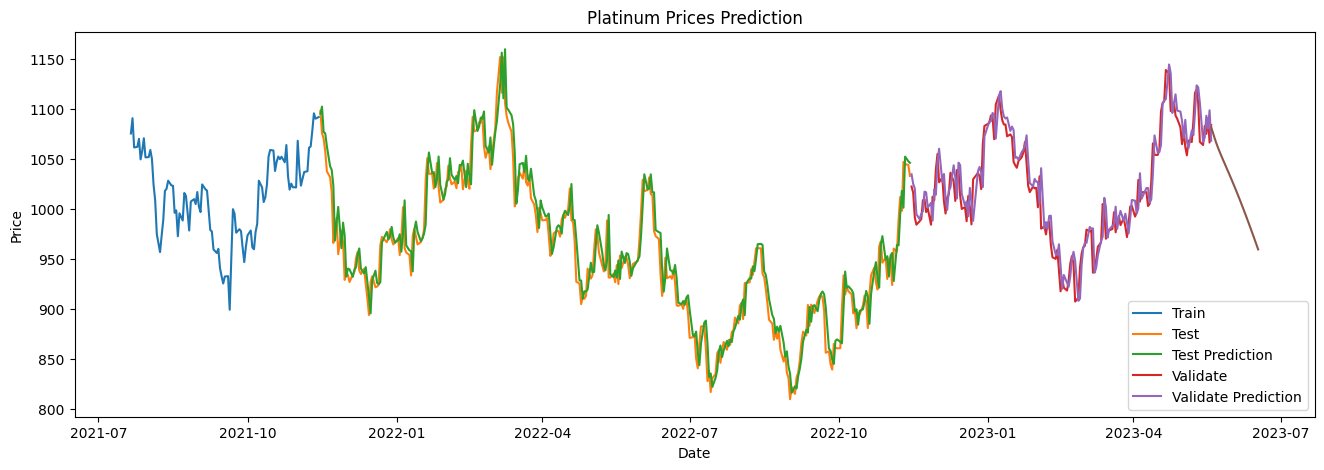

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  14.305648558392791
MAPE:  1.4977263138372903
RMSE:  18.68132939090412

** Validate **
MAE:  14.167832217854304
MAPE:  1.3908912781394498
RMSE:  18.208204415641976


# Split dataset (6-3-1)

---



In [ ]:
# 4. Split data (6-3-1)
train_size = int(0.6 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_6_3_1.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.17000, saving model to save_model_6_3_1.hdf5
17/17 - 11s - loss: 0.1700 - 11s/epoch - 637ms/step
Epoch 2/80

Epoch 2: loss improved from 0.17000 to 0.05958, saving model to save_model_6_3_1.hdf5
17/17 - 3s - loss: 0.0596 - 3s/epoch - 174ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05958 to 0.04139, saving model to save_model_6_3_1.hdf5
17/17 - 5s - loss: 0.0414 - 5s/epoch - 286ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04139 to 0.04060, saving model to save_model_6_3_1.hdf5
17/17 - 3s - loss: 0.0406 - 3s/epoch - 174ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04060 to 0.03853, saving model to save_model_6_3_1.hdf5
17/17 - 3s - loss: 0.0385 - 3s/epoch - 171ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03853 to 0.03763, saving model to save_model_6_3_1.hdf5
17/17 - 3s - loss: 0.0376 - 3s/epoch - 171ms/step
Epoch 7/80

Epoch 7: loss did not improve from 0.03763
17/17 - 4s - loss: 0.0377 - 4s/epoch - 239ms/step
Epoch 8/8

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_6_3_1.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

27/27 [==============================] - 3s 65ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

15/15 [==============================] - 1s 60ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

5/5 [==============================] - 0s 46ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6372745490981963, 0.651786331283256, 0.623177389261281, 0.5912514684541498, 0.5826826065924952, 0.5903531200331699, 0.5879344896689932, 0.5886255269159008, 0.5618132817358855, 0.6045193835947756, 0.5322368875682398, 0.5354847626287057, 0.5243590629534932, 0.5403911270817497, 0.5417732015755651, 0.5099854882178151, 0.4928477644945063, 0.49056734157971105, 0.5033515306475019, 0.47543362587243465, 0.44585723170478875, 0.4641006150231498, 0.4508326998825237, 0.4468937875751503, 0.46133646603551937, 0.4842097989081612, 0.49450625388708447, 0.483726072835326, 0.4317600718678737, 0.43680464377029915, 0.4791652270057355, 0.49796144012162247, 0.5066685094326583, 0.5086034137239998, 0.5309930205238061, 0.5286434938843204, 0.5298873609287541, 0.4714256098403703, 0.4773685301637759, 0.48939257825996807, 0.5072213392301846, 0.5133715707276622, 0.5662359201160941, 0.5557321539630985, 0.5184161426300876, 0.5278142491880312, 0.5298873609287541, 0.5318222652200953, 0.5550411167161909, 0.527

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.6637594103813171], [0.6506330966949463], [0.6342869997024536], [0.6194974184036255], [0.6060863733291626], [0.5939803719520569], [0.5831723809242249], [0.5735605955123901], [0.5649349689483643], [0.5570217967033386], [0.5495335459709167], [0.5422082543373108], [0.5348358750343323], [0.5272707343101501], [0.5194311141967773], [0.5112917423248291], [0.5028719305992126], [0.4942207932472229], [0.4854032099246979], [0.47648856043815613], [0.4675416052341461], [0.4586167633533478], [0.44975563883781433], [0.44098666310310364], [0.4323272705078125], [0.4237862229347229], [0.41536733508110046], [0.40707269310951233], [0.3989049196243286], [0.3908694088459015]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1075.46312138]
 [1065.96557711]
 [1054.13835863]
 [1043.43735709]
 [1033.73379542]
 [1024.97449813]
 [1017.15437622]
 [1010.19976888]
 [1003.95869678]
 [ 998.233121  ]
 [ 992.81499719]
 [ 987.51478243]
 [ 982.18049738]
 [ 976.70673981]
 [ 971.03438268]
 [ 965.14514016]
 [ 959.05298539]
 [ 952.79345495]
 [ 946.41349254]
 [ 939.96329791]
 [ 933.48972847]
 [ 927.03215912]
 [ 920.62069248]
 [ 914.27590009]
 [ 908.01039658]
 [ 901.8305216 ]
 [ 895.7390353 ]
 [ 889.7374471 ]
 [ 883.82765459]
 [ 878.01356077]]


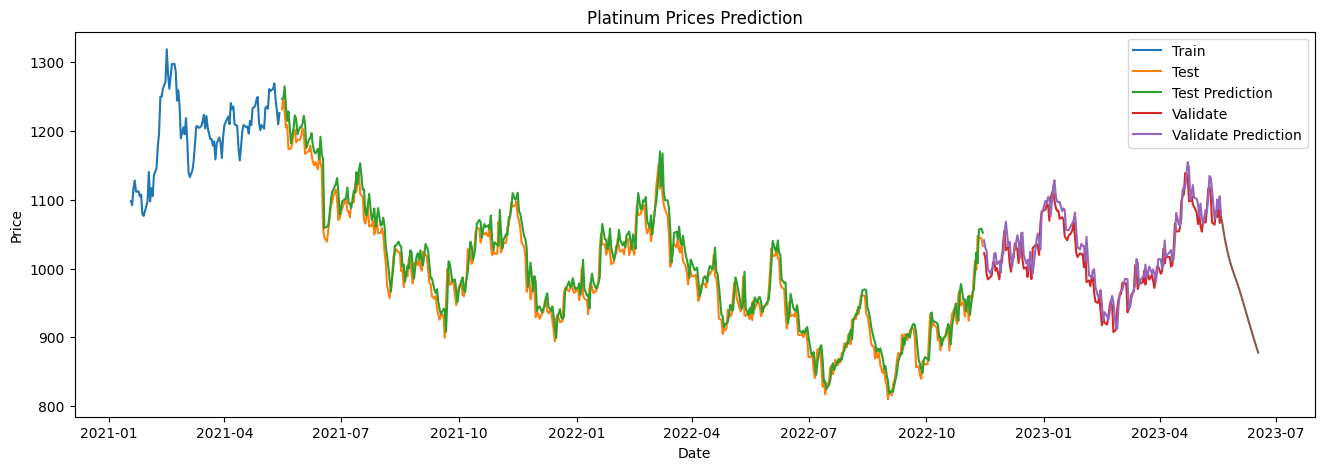

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  16.3725187052496
MAPE:  1.6565884269035749
RMSE:  21.109077805961544

** Validate **
MAE:  16.504109648686313
MAPE:  1.6179930016584052
RMSE:  20.598644739844225


# Split dataset (5-3-2)

---



In [ ]:
# Split data
train_size = int(0.5 * len(df1))
test_size = int(0.3 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [ ]:
# Create training datasets for the model
x_train, y_train = [], []

# Loop through the train data, starting from the 5th value
for i in range(100, len(train_data)):
    # Append the last 100 values to the x_train array
    x_train.append(sc_train[i-100:i, 0])
    # Append the current value to the y_train array
    y_train.append(sc_train[i, 0])

In [ ]:
# Convert the x_train and y_train arrays to NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Reshape the x_train and y_train arrays to be one-dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], 1))

In [ ]:
# Build the model
model = Sequential()

# Add an LSTM layer with 50 units, input shape of (x_train.shape[1], 1), and return_sequences set to True
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

# Add an LSTM layer with 50 units
model.add(LSTM(50,return_sequences=True))

# Add an LSTM layer with 50 units
model.add(LSTM(50))

# Add a dense layer with 1 unit
model.add(Dense(1))

# Compile the model with the 'mean_absolute_error' loss function and the 'adam' optimizer
model.compile(loss='mean_absolute_error', optimizer='adam')
# Set the filename to use for saving the model
save_model = 'save_model_5_3_2.hdf5'

# Create a ModelCheckpoint object to save the model during training
best_model = ModelCheckpoint(save_model, monitor='loss', verbose=2, save_best_only=True, mode='auto')

# Train the model using the 'fit' method
model.fit(x_train, y_train, epochs=80, batch_size=50, verbose=2, callbacks=[best_model])

Epoch 1/80

Epoch 1: loss improved from inf to 0.15737, saving model to save_model_5_3_2.hdf5
14/14 - 10s - loss: 0.1574 - 10s/epoch - 732ms/step
Epoch 2/80

Epoch 2: loss improved from 0.15737 to 0.05523, saving model to save_model_5_3_2.hdf5
14/14 - 2s - loss: 0.0552 - 2s/epoch - 174ms/step
Epoch 3/80

Epoch 3: loss improved from 0.05523 to 0.04642, saving model to save_model_5_3_2.hdf5
14/14 - 2s - loss: 0.0464 - 2s/epoch - 175ms/step
Epoch 4/80

Epoch 4: loss improved from 0.04642 to 0.04099, saving model to save_model_5_3_2.hdf5
14/14 - 2s - loss: 0.0410 - 2s/epoch - 175ms/step
Epoch 5/80

Epoch 5: loss improved from 0.04099 to 0.03876, saving model to save_model_5_3_2.hdf5
14/14 - 4s - loss: 0.0388 - 4s/epoch - 293ms/step
Epoch 6/80

Epoch 6: loss improved from 0.03876 to 0.03597, saving model to save_model_5_3_2.hdf5
14/14 - 4s - loss: 0.0360 - 4s/epoch - 265ms/step
Epoch 7/80

Epoch 7: loss did not improve from 0.03597
14/14 - 3s - loss: 0.0368 - 3s/epoch - 201ms/step
Epoch 8/8

In [ ]:
# Transform the y_train array back to the original scale
y_train = sc.inverse_transform(y_train)

# Load the best model from the save_model.hdf5 file
final_model = load_model('save_model_5_3_2.hdf5')

# Use the model to make predictions on the x_train data
y_train_predict = final_model.predict(x_train)

# Transform the y_train_predict array back to the original scale
y_train_predict = sc.inverse_transform(y_train_predict)

22/22 [==============================] - 2s 44ms/step


In [ ]:
# Preprocess the test data
test = df1[len(train_data)-100:train_size+test_size].values
test = test.reshape(-1, 1)
sc_test = sc.transform(test)

# Create the x_test array for the test data
x_test = []
for i in range(100, test.shape[0]):
    x_test.append(sc_test[i-100:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the true values for the test data
y_test = data[train_size:train_size+test_size]  # True values

# Use the model to make predictions on the x_test data
y_test_predict = final_model.predict(x_test)

# Transform the y_test_predict array back to the original scale
y_test_predict = sc.inverse_transform(y_test_predict)  # Predicted values

15/15 [==============================] - 1s 43ms/step


In [ ]:
# Preprocess the validate data
val = df1[train_size+test_size-100:].values
val = val.reshape(-1, 1)
sc_val = sc.transform(val)

# Create the x_val array for the validate data
x_val = []
for i in range(100, val.shape[0]):
    x_val.append(sc_val[i-100:i, 0])
x_val = np.array(x_val)
x_val = np.reshape(x_val, (x_val.shape[0], x_val.shape[1], 1))

# Get the true values for the validate data
y_val = data[train_size+test_size:]  # True values

# Use the model to make predictions on the x_val data
y_val_predict = final_model.predict(x_val)

# Transform the y_val_predict array back to the original scale
y_val_predict = sc.inverse_transform(y_val_predict)  # Predicted values

10/10 [==============================] - 0s 44ms/step


In [ ]:
# Create an input array using the last 10 days of the scaled test data
x_input = sc_train[len(sc_train) - 100:].reshape(1, -1)

# Print the shape of the input array
print(x_input.shape)

# Convert x_input to a list and extract the first element
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

# Print the temp_input variable
print(temp_input)

(1, 100)
[0.6372745490981963, 0.651786331283256, 0.623177389261281, 0.5912514684541498, 0.5826826065924952, 0.5903531200331699, 0.5879344896689932, 0.5886255269159008, 0.5618132817358855, 0.6045193835947756, 0.5322368875682398, 0.5354847626287057, 0.5243590629534932, 0.5403911270817497, 0.5417732015755651, 0.5099854882178151, 0.4928477644945063, 0.49056734157971105, 0.5033515306475019, 0.47543362587243465, 0.44585723170478875, 0.4641006150231498, 0.4508326998825237, 0.4468937875751503, 0.46133646603551937, 0.4842097989081612, 0.49450625388708447, 0.483726072835326, 0.4317600718678737, 0.43680464377029915, 0.4791652270057355, 0.49796144012162247, 0.5066685094326583, 0.5086034137239998, 0.5309930205238061, 0.5286434938843204, 0.5298873609287541, 0.4714256098403703, 0.4773685301637759, 0.48939257825996807, 0.5072213392301846, 0.5133715707276622, 0.5662359201160941, 0.5557321539630985, 0.5184161426300876, 0.5278142491880312, 0.5298873609287541, 0.5318222652200953, 0.5550411167161909, 0.527

In [ ]:
# Initialize variables
lst_output = []
n_steps = 100
i = 0

# Loop through the next 30 days
while(i < 30):
    # If the length of temp_input is greater than 30, use the first 30 elements to make a prediction
    if(len(temp_input) > 100):
        # Extract the first 3 elements of temp_input and reshape them for input to the model
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape((1, -1))
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list and remove the first element
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1
    # If the length of temp_input is less than 30, use the entire list to make a prediction
    else:
        # Reshape temp_input for input to the model
        x_input = x_input.reshape((1, n_steps, 1))

        # Make a prediction using the model
        yhat = model.predict(x_input, verbose=0)

        # Add the prediction to the temp_input list
        temp_input.extend(yhat[0].tolist())

        # Add the prediction to the lst_output list
        lst_output.extend(yhat.tolist())
        i += 1

# Print the final list of predictions
print(lst_output)

[[0.6837151646614075], [0.6907954216003418], [0.6962507367134094], [0.6999160051345825], [0.7018305659294128], [0.7023430466651917], [0.7019295692443848], [0.7010744214057922], [0.7001935243606567], [0.6995889544487], [0.6994343996047974], [0.6997830867767334], [0.7005923986434937], [0.7017567753791809], [0.7031406164169312], [0.7046079039573669], [0.7060425281524658], [0.7073613405227661], [0.7085181474685669], [0.709500789642334], [0.7103237509727478], [0.7110190391540527], [0.7116256356239319], [0.7121824026107788], [0.7127215266227722], [0.7132654786109924], [0.7138261198997498], [0.7144061326980591], [0.715001106262207], [0.7156023979187012]]


In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Print the inverse transformed list of predictions
print(y_pred_future)

[[1089.90210739]
 [1095.0250273 ]
 [1098.97222055]
 [1101.62422552]
 [1103.00950598]
 [1103.38031141]
 [1103.08113983]
 [1102.46239761]
 [1101.82502455]
 [1101.38758799]
 [1101.27575983]
 [1101.52805244]
 [1102.11363004]
 [1102.95611483]
 [1103.95739301]
 [1105.01904891]
 [1106.05707124]
 [1107.01129794]
 [1107.8483056 ]
 [1108.55929635]
 [1109.15475002]
 [1109.65782578]
 [1110.09672866]
 [1110.49957741]
 [1110.88966059]
 [1111.28323705]
 [1111.68888905]
 [1112.10855731]
 [1112.53905044]
 [1112.97411501]]


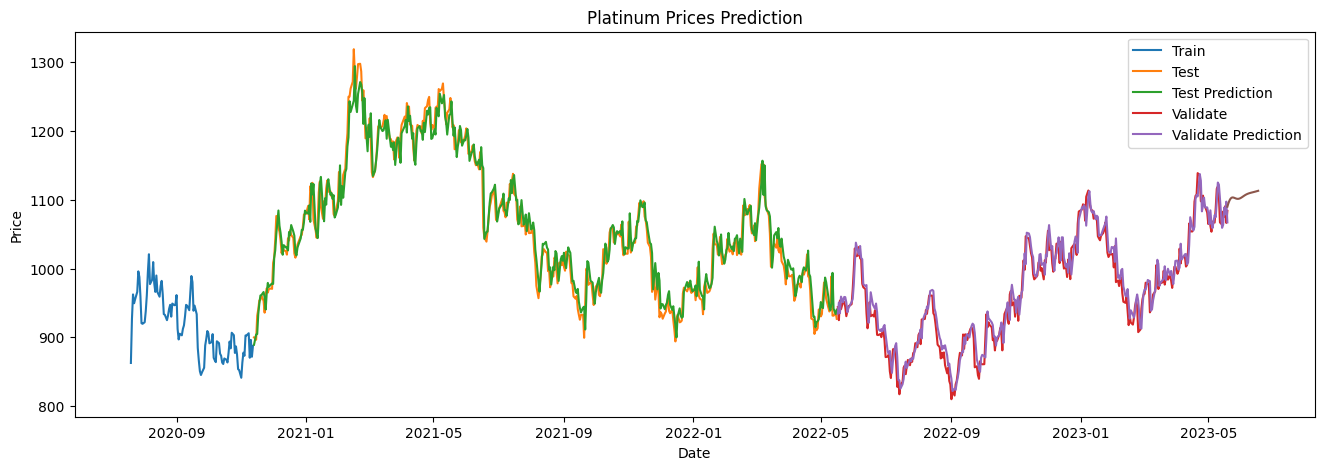

In [ ]:
# Inverse transform the lst_output list using the StandardScaler object
y_pred_future = sc.inverse_transform(lst_output)

# Create a dataframe for the future predictions, with the date as the index and the 'price' column
PREDICTIONS_FUTURE = pd.DataFrame(y_pred_future, columns=['price']).set_index(pd.Series(datelist_future))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

# Set the figure size and create a subplot
plt.figure(figsize=(16,5))

# Create a plot to compare the predicted and true values for the training and test data
plt.plot(train_data.index[train_size-100:], train_data.Price[train_size-100:])
plt.plot(test_data)

# Plot the actual and predicted prices in the test set, and the predicted future prices
plt.plot(test_data.index, y_test_predict)
plt.plot(val_data)
plt.plot(val_data.index, y_val_predict)

plt.plot(PREDICTIONS_FUTURE)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Platinum Prices Prediction')
plt.legend(['Train','Test','Test Prediction','Validate', 'Validate Prediction'])
plt.show()

In [ ]:
evaluateModel(test_data.values,y_test_predict,val_data.values,y_val_predict)

** Testing **
MAE:  15.624855319233475
MAPE:  1.4739448803547268
RMSE:  20.380960685967178

** Validate **
MAE:  14.249077273637823
MAPE:  1.4849428975859604
RMSE:  18.230193650388284


# Evaluate Model

---

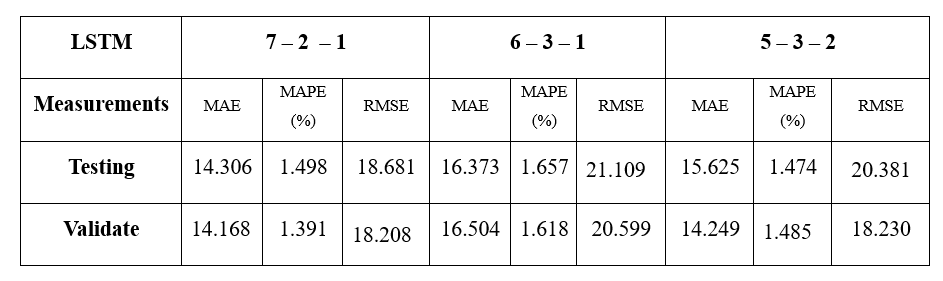